# Сборный проект

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from scipy.stats import binom, poisson, norm
from math import sqrt, factorial

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('games.csv')


In [3]:
class Information:
    def __init__(self, df):
        self.df = df
    
    def head_df(self, value):
        return self.df.head(value)
    
    def info_df(self):
        print('Сводная информация о датасете:\n')
        return self.df.info()
    
    def dupl_df(self):
        print('\nПроверка наличия дубликатов в датасете:', self.df.duplicated().sum(),'\n')
        
    def isna_df(self):
        print('Подсчет пропусков в датасете:')
        return self.df.isna().sum()
    
    def desc_df(self):
        return self.df.describe()

In [4]:
df = Information(data)

In [5]:
df.head_df(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
df.info_df()


Сводная информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.dupl_df()
df.isna_df()


Проверка наличия дубликатов в датасете: 0 

Подсчет пропусков в датасете:


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
df.desc_df()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Вывод:**

Данных достаточно для дальнейшей работы.
1. Датафрейм вкючает в себя **11** столбцов и **16715** строк. 


2. Явные дубликаты отсутствуют. 


3. Пропуски в датасете присутствуют в столбцах:
    - `Name`            
    - `Year_of_Release`               
    - `Genre`               
    - `Critic_Score`             
    - `User_Score`              
    - `Rating`                         
              
    Пропуски могут быть связаны с человеческим фактором. Также, пропуски могут возникнуть по техническим причинам.


4. В названии столбцов есть не соответствие со стилем. Приведем все названия в нижний регистр.



5. С типами также есть не соответствия:
    - `Year_of_Release`
    - `User_Score` 
    - `Critic_Score`
      

### Шаг 2. Подготовьте данные

**Замените названия столбцов (приведите к нижнему регистру)**

In [9]:
data.columns = data.columns.str.lower()

In [10]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Обработайте пропуски при необходимости**

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Столбцы: `name` и `genre`**

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропусков всего 2 в столбце `name` и в столбце `genre` скорее всего не повлияют на данные. Удалим их.

In [14]:
data.dropna(subset=['name'], inplace=True)

**Столбец: `year_of_release`**

In [15]:
print('Доля пропусков в столбце year_of_release составляет {:.1%}'
      .format(len(data[data['year_of_release'].isnull() == True]) / data.shape[0]))

Доля пропусков в столбце year_of_release составляет 1.6%


Не у всех игр смогли найти дату выхода. Пропусков менее 2%, удалим эти строки.

In [16]:
#data['year_of_release'] = data['year_of_release'].fillna(0)
data.dropna(subset=['year_of_release'], inplace=True)

**Стобцы: critic_score, user_score, rating**

In [90]:
print('Доля пропусков в столбце critic_score составляет {:.1%}'
      .format(len(data[data['critic_score'].isnull() == True]) / data.shape[0]))

print('Доля пропусков в столбце user_score составляет {:.1%}'
      .format(len(data[data['user_score'].isnull() == True]) / data.shape[0]))

print('Доля пропусков в столбце rating составляет {:.1%}'
      .format(len(data[data['rating'].isnull() == True]) / data.shape[0]))

Доля пропусков в столбце critic_score составляет 51.5%
Доля пропусков в столбце user_score составляет 40.2%
Доля пропусков в столбце rating составляет 40.6%


Допустимо удалить не более **10%** от датасета, значит удалять данные не нужно. Такое большое количество пропусков скорее всего произошло по причине технического фактора. Заполним данные пропуски нельзя, так как это может исказить анализ. Аббревиатура "tbd" (от англ. to be determined - будет определено позднее). Значит она показывает, что информация не определена, заменим ее на NaN.

In [17]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)
#data[''] = data[''].fillna('-1')
#data[''] = data[''].fillna('-1')

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Столбец `rating` является категориальным, заполнить его пропуски можем как `unknown`.

In [19]:
data['rating'] = data['rating'].fillna('unknown')


In [20]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Преобразуйте данные в нужные типы.** 

In [21]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')
data['user_score'] = data['user_score'].astype('float64', errors='ignore')
data['critic_score'] = data['critic_score'].astype('int64', errors='ignore')

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец**

In [22]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [23]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


**Вывод:**

1. Привели названия столбцов к нижнему регистру.

2. Дубликатов не выявлено.

3. Выявлено большое количество пропусков в столбцах:
    - `critic_score`  :     **8578**
    - `user_score`    :     **6701**
    - `rating`        :     **6766**
    
    Скорей всего пропуски возникли по техническим причинам (некорректно загруженные/выгруженные данные, сбои в базе данных). Также были выявлены и незначительные пропуски, которые можно было удалить без последствий для данных. Еще пропуски в столбце `year_of_release` количество составило **269**, так как пропусков меньше 2%, то удалим их тоже. Потому что не у всех игр наверное смогли найти дату выхода. 
    
4. Также определили, что аббревиатура "tbd" (от англ. to be determined - будет определено позднее). Значит она показывает, что информация не определена, заменим ее на NaN.

5. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
 


### Шаг 3. Проведите исследовательский анализ данных

**Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [24]:
game_release_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')\
.sort_values(by='year_of_release', ascending=False)
game_release_years.columns = ['count']

In [25]:
game_release_years.describe()

,count
count,37.000000
mean,444.432432
std,451.604334
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


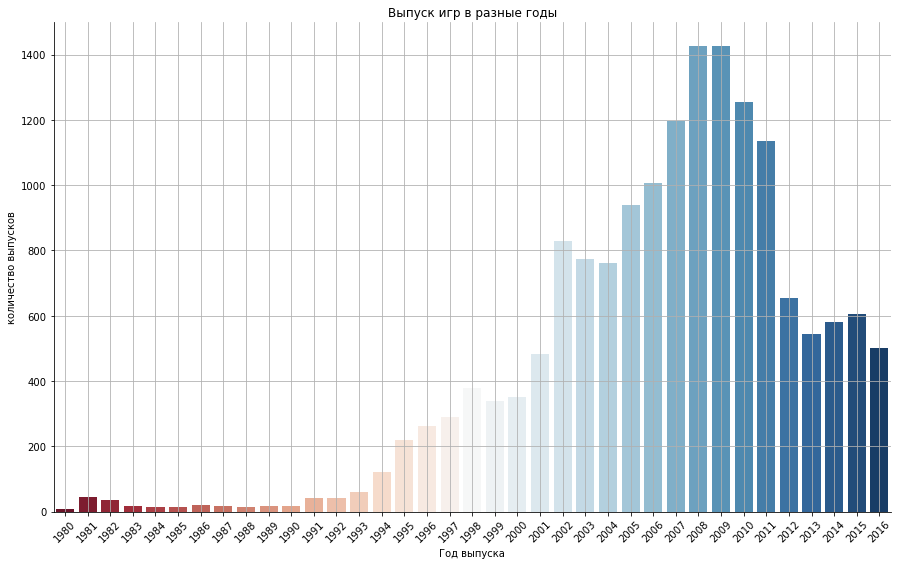

In [26]:

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x=game_release_years.index, y='count', data=game_release_years, palette='RdBu')
plt.title('Выпуск игр в разные годы')
plt.xlabel('Год выпуска')
plt.ylabel('количество выпусков')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()


- до 1993 года активности выпусков было мало.
- с 1993 по 2007 наблюдается активный рост.
- в 2008 и 2009 года пик количества выпущенных игр.
- после 2011 года наблюдается спад выпуска игр.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [27]:
sales_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
sales_platforms.columns = ['sum']
sales_platforms = sales_platforms.sort_values(by='sum', ascending=False)

In [28]:
sales_platforms.describe()

,sum
count,31.000000
mean,284.334516
std,343.954144
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


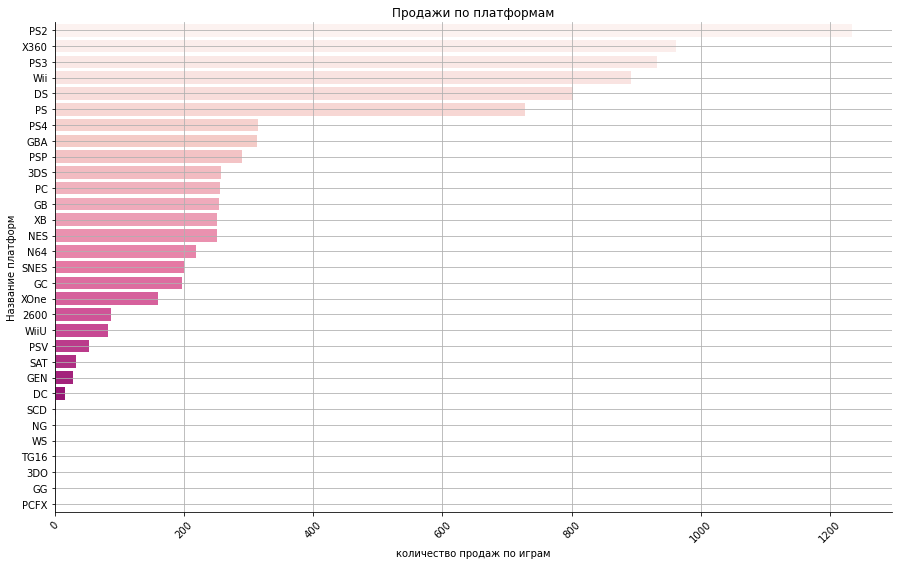

In [29]:

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=sales_platforms.index, data=sales_platforms, orient='h',  palette='RdPu')
plt.title('Продажи по платформам')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название платформ')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()



На графике видим, что больше всего игр выпустили для:
- PS2
- X360
- PS3
- Wii
- DS

Лидером продаж PS2, а затем следуют X360 и  PS3.

In [30]:
# выделим названия топ 5 платформ в виде списка
top_platform_list = list(sales_platforms.head(5).index.values)
top_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [32]:
# выделим топовые платформы и возьмем данные не раньше 1994 года
top_platform_condition = data[(data['year_of_release'] >= 1994) & (data['platform'].isin(top_platform_list))]

top_platform = top_platform_condition.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')


In [33]:
top_platform.describe()

platform,DS,PS2,PS3,Wii,X360
count,10.000000,12.000000,11.000000,11.000000,12.000000
mean,80.276000,102.796667,84.667273,81.016364,80.103333
std,59.796231,79.405729,54.637565,79.136330,57.484408
min,1.540000,0.450000,3.600000,0.180000,1.520000
25%,19.497500,35.977500,34.360000,6.170000,29.045000
50%,102.280000,89.705000,107.360000,59.650000,91.995000
75%,127.557500,170.900000,124.725000,144.960000,124.032500
max,146.940000,211.810000,156.780000,206.970000,170.030000


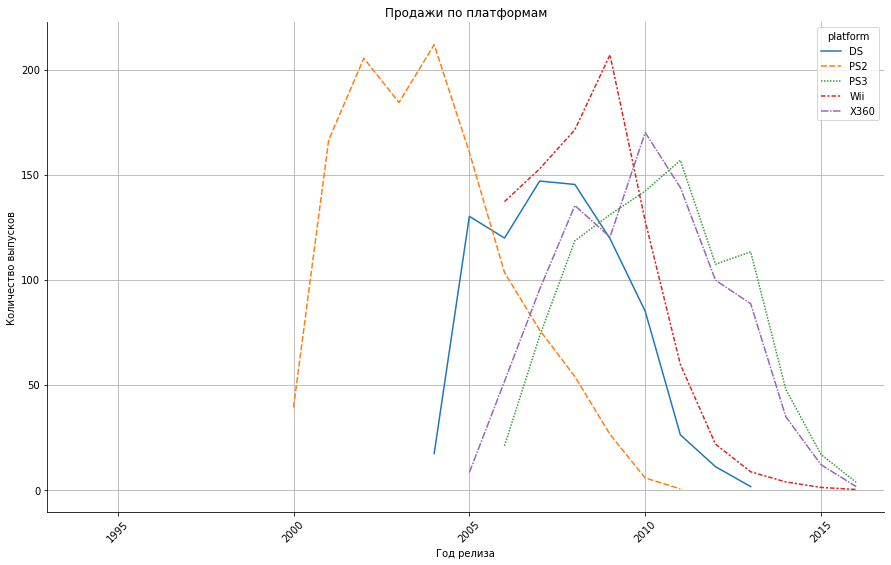

In [34]:

plt.subplots(figsize=(15,9))
sns.lineplot(data=top_platform, palette='tab10', linewidth= 1.5)
plt.title('Продажи по платформам')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпусков')
plt.xlim(1993, None)
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()



При помощи графика мы видим жизненный цикл платформ:
- PS2 - появилась в 2000 году. Имеет 2 пика популярности примерно в 2002 и 2004 годах. После 2005 года число выпускаемых игр начала падать.
- X360 - появилась в 2006 году. Имеет пик популярности примерно в 2010 году. После 2011 года число выпускаемых игр начала падать.
- PS3 - появилась в 2006 году. Популярности достигла примерно в 2011 году. После 2011 года число выпускаемых игр начала падать.
- Wii - появилась в 2006 году. Имеет пик популярности в 2009 году. После 2009 года число выпускаемых игр начала падать.
- DS - появилась в 2004 году. Достигла популярности примерно в 2007-2008 годах. Прекратили производить релизы примерно в 2013 году.

Итог: Продолжительность жизни платформ примерно 10 - 15 лет. 

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Построим график релизов по годам для топа платформ, но за принятый нами актуальный период, так как в 2013-2015 наблюдалась стабильность релизов,а после рилизы пошли на спад, то возьмем год 2013.

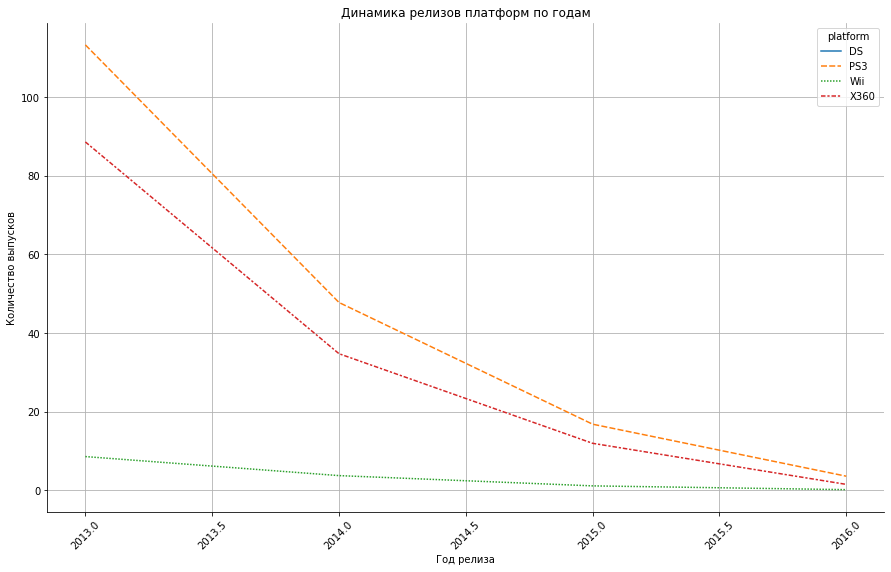

In [35]:
top_platform_period = data[(data['year_of_release'] >= 2013) & (data['platform'].isin(top_platform_list))]

top_platform_period_dinamic = top_platform_period.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

plt.subplots(figsize=(15,9))
sns.lineplot(data=top_platform_period_dinamic, palette='tab10', linewidth= 1.5)
plt.title('Динамика релизов платформ по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпусков')
plt.xticks(rotation=45)
sns.despine()
plt.grid()
plt.show()

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Построим еще один график, только увеличим число отображаемых платформ и скорректируем актуальный период.

In [36]:
top_platform_leaderboard = data[data['year_of_release'] >= 2013].pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
)

top_platform_leaderboard.columns = ['sum']
top_platform_leaderboard = top_platform_leaderboard.sort_values(by='sum', ascending=False)

top_platform_leaderboard_list = list(top_platform_leaderboard.index.values)


In [37]:
top_platform_leaderboard.describe()

,sum
count,11.000000
mean,99.153636
std,97.516096
min,1.540000
25%,23.325000
50%,64.630000
75%,151.285000
max,314.140000


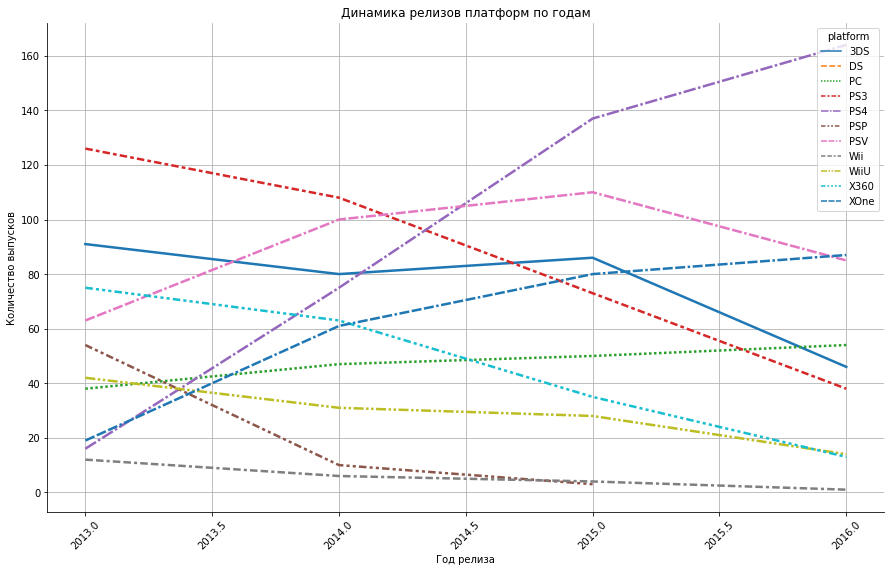

In [38]:
top_platform_lb = data[(data['year_of_release'] >= 2013) & (data['platform'].isin(top_platform_leaderboard_list))]

top_platform_lb_for_grahic = top_platform_lb.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='count'
)

plt.subplots(figsize=(15,9))
sns.lineplot(data=top_platform_lb_for_grahic, palette='tab10', linewidth= 2.5)
plt.title('Динамика релизов платформ по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпусков')
plt.xticks(rotation=45)
sns.despine()
plt.grid()
plt.show()

На графике видно, что на конец 2016 года лидируют, скорее всего на 2017 год  эти платформы могут быть актуальными:
- PS4
- XOne
- PC

Так же есть платформы, которые падают по продажам:
- PSV
- 3DS
- PS3
- WiiU
- X360

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

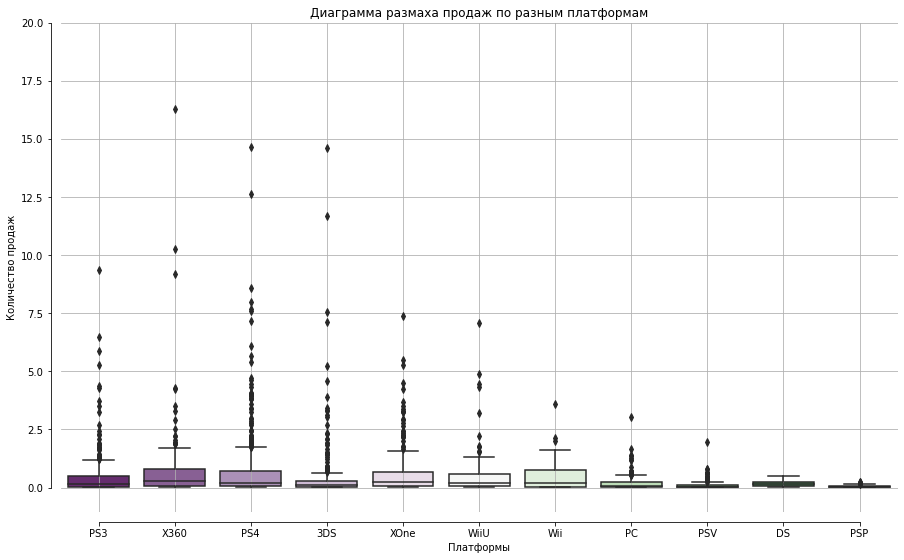

In [39]:
plt.subplots(figsize=(15,9))
sns.boxplot(x='platform', y='total_sales', data=data[(data['year_of_release'] >= 2013)], palette='PRGn')
plt.title('Диаграмма размаха продаж по разным платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.ylim(None, 20)
sns.despine(offset=10, trim=True)
plt.grid()
plt.show()

Диаграмма размаха для лидирующих платформ с 2013 года

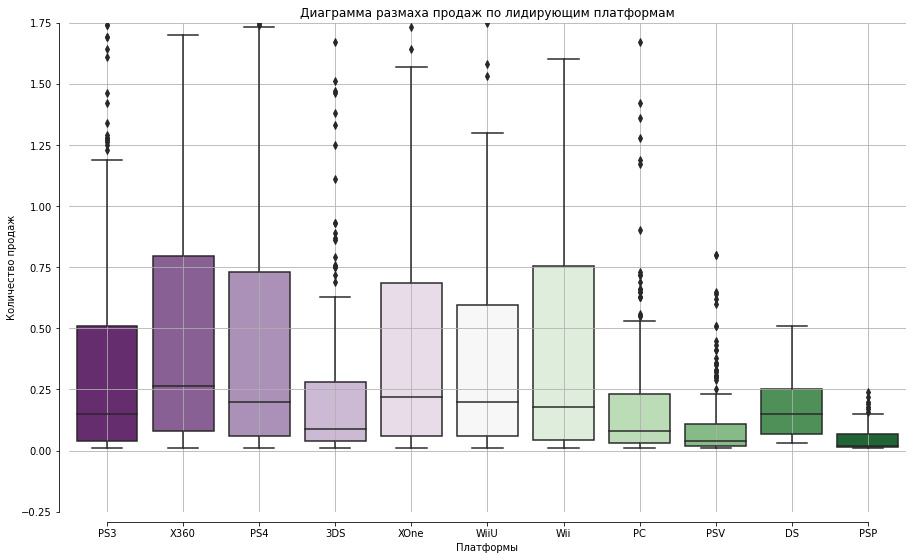

In [40]:
plt.subplots(figsize=(15,9))
sns.boxplot(x='platform', y='total_sales', data=data[(data['year_of_release'] >= 2013)], palette='PRGn')
plt.title('Диаграмма размаха продаж по лидирующим платформам')
plt.xlabel('Платформы')
plt.ylabel('Количество продаж')
plt.ylim(-0.25, 1.75)
sns.despine(offset=10, trim=True)
plt.grid()
plt.show()

Консоли XOne и PS4 показывают почти схожую картину по медиане и размаху. Схожесть также была между X360 и PS3.

**Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Возьмем для анализа топовые платформы на конец 2016 года.

In [41]:
top_platform_rating = data[(data['year_of_release'] >= 2013) &
     (data['user_score'] >= 0) & 
     (data['critic_score'] >= 0) & 
     (data['platform'].isin(top_platform_leaderboard_list))]


Рассмотрим основные платформы:
- оценка пользователей
- оценка критиков

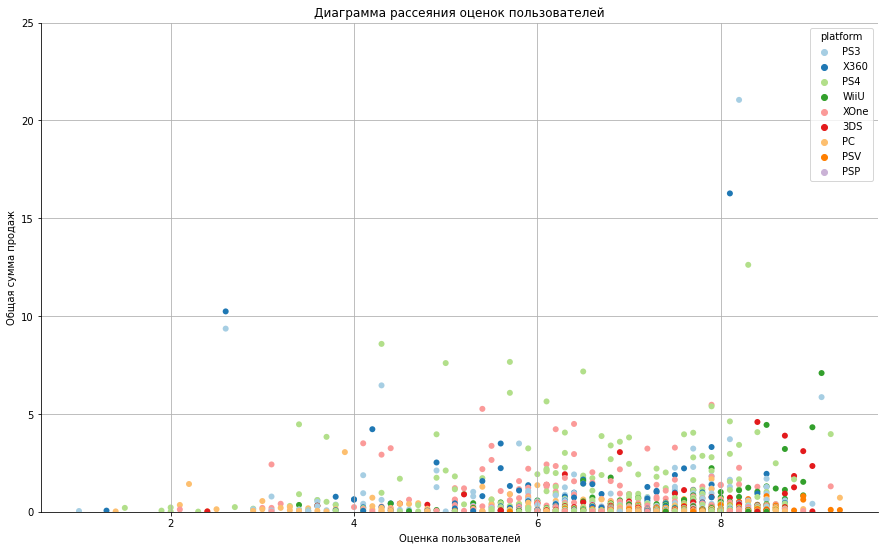

In [42]:
plt.subplots(figsize=(15,9))

sns.scatterplot(x='user_score',
                y='total_sales',
                hue='platform', 
                data=top_platform_rating, 
                palette='Paired',
               sizes=(1,8),
               linewidth=0)

plt.title('Диаграмма рассеяния оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая сумма продаж')
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show()

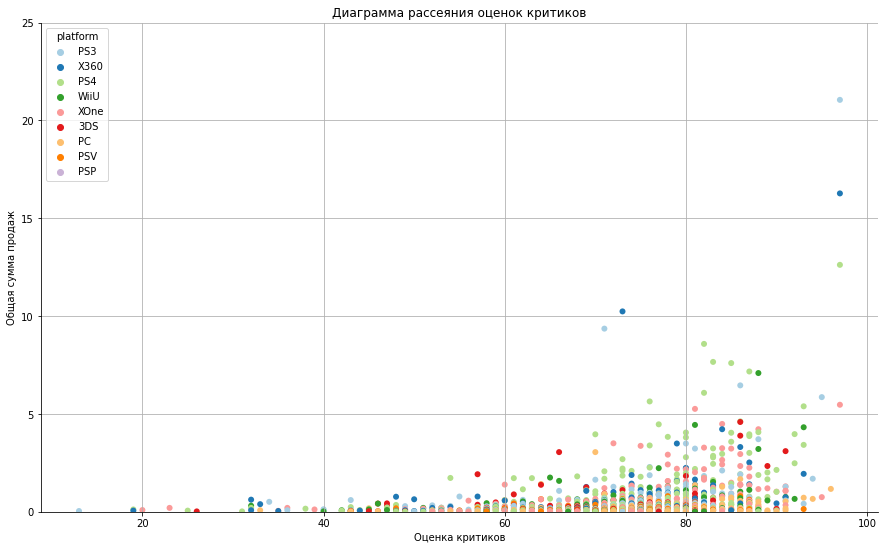

In [43]:
plt.subplots(figsize=(15,9))

sns.scatterplot(x='critic_score',
                y='total_sales',
                hue='platform', 
                data=top_platform_rating, 
                palette='Paired',
               sizes=(1,8),
               linewidth=0)

plt.title('Диаграмма рассеяния оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Общая сумма продаж')
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show()

Рассмотрим топ 3 платформы:
- оценка пользователей
- оценка критиков

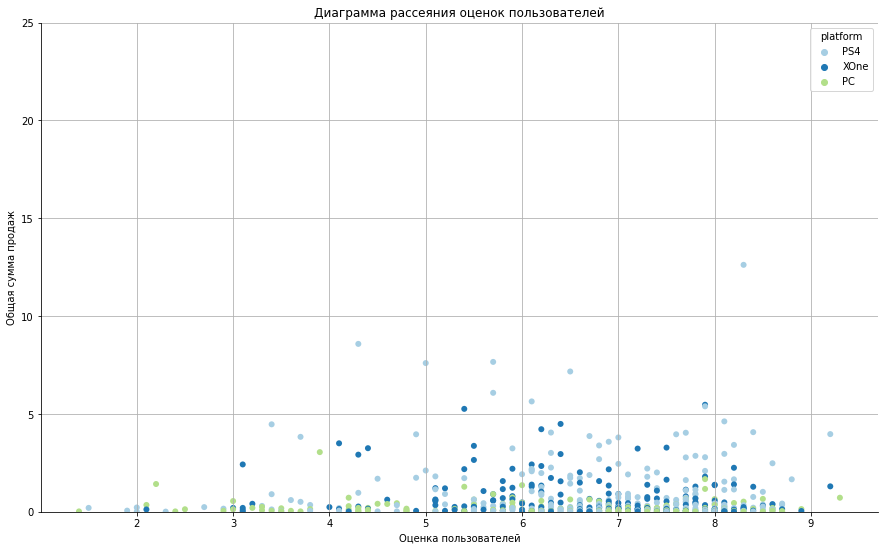

In [44]:
plt.subplots(figsize=(15,9))

sns.scatterplot(x='user_score',
                y='total_sales',
                hue='platform', 
                data=top_platform_rating[top_platform_rating['platform'].isin(['PS4', 'XOne', 'PC'])], 
                palette='Paired',
               sizes=(1,8),
               linewidth=0)

plt.title('Диаграмма рассеяния оценок пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Общая сумма продаж')
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show()

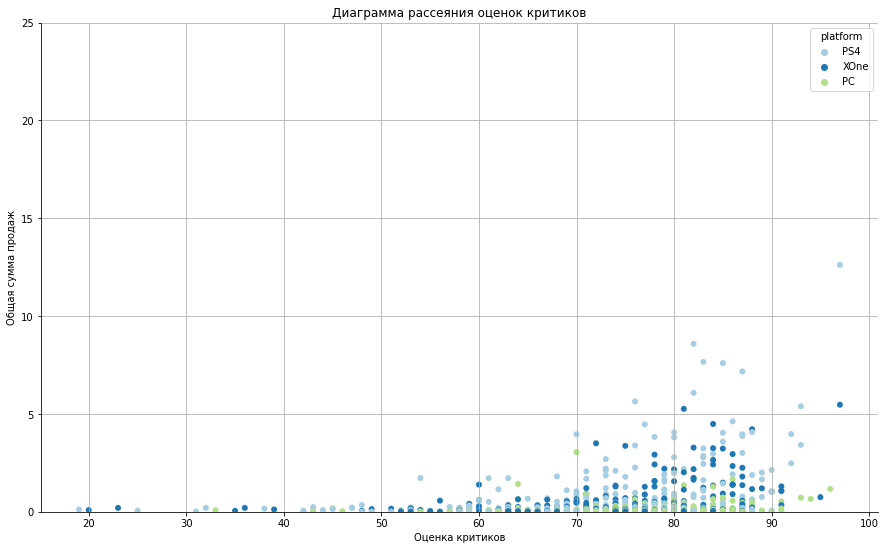

In [45]:
plt.subplots(figsize=(15,9))

sns.scatterplot(x='critic_score',
                y='total_sales',
                hue='platform', 
                data=top_platform_rating[top_platform_rating['platform'].isin(['PS4', 'XOne', 'PC'])], 
                palette='Paired',
               sizes=(1,8),
               linewidth=0)

plt.title('Диаграмма рассеяния оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Общая сумма продаж')
plt.ylim(0, 25)
sns.despine()
plt.grid()
plt.show()

По диаграммам оценки полизователей и критиков видно, что показатели критиков сельнее влияют на объем продаж и помогает его предсказать.  

Посчитаем корреляцию между отзывами и продажами и оценками для платформ PS4, XOne, PC. 

In [46]:
# Создадим переменные, чтобы упростить реализацию тепловых карт для каждой топовой платформы.
three_top_platform = top_platform_rating[top_platform_rating['platform'].isin(['PS4', 'XOne', 'PC'])]

pc = three_top_platform[three_top_platform['platform'] == 'PC']
xone = three_top_platform[three_top_platform['platform'] == 'XOne']
ps_four = three_top_platform[three_top_platform['platform'] == 'PS4']


Text(0.5, 1.0, 'Все платформы')

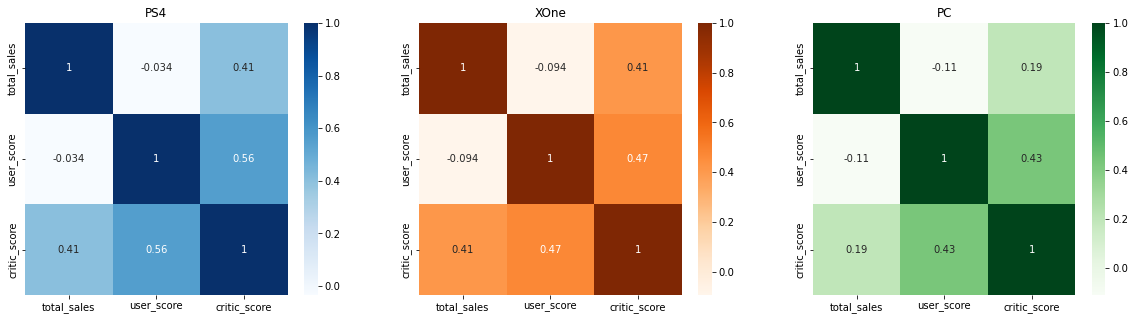

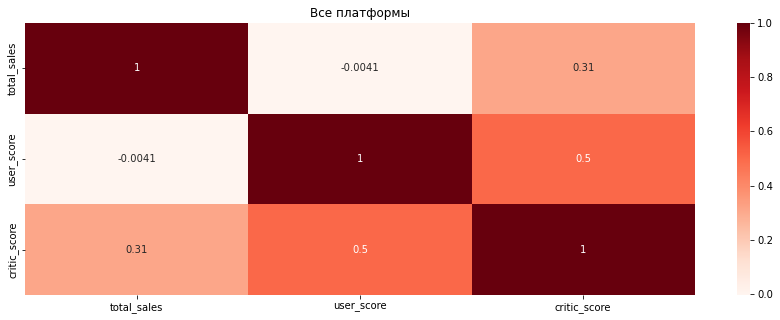

In [47]:
plt.figure(figsize=(20,5))

#PS4
plt.subplot(1,3,1)
sns.heatmap(ps_four[['total_sales', 'user_score', 'critic_score']].corr(), annot=True, cmap='Blues')
plt.title('PS4')

#XOne
plt.subplot(1,3,2)
sns.heatmap(xone[['total_sales', 'user_score', 'critic_score']].corr(), annot=True, cmap='Oranges')
plt.title('XOne')

#PC
plt.subplot(1,3,3)
sns.heatmap(pc[['total_sales', 'user_score', 'critic_score']].corr(), annot=True, cmap='Greens')
plt.title('PC')

plt.figure(figsize=(15,5))
sns.heatmap(top_platform_rating[['total_sales', 'user_score', 'critic_score']].corr(), annot=True, cmap='Reds')
plt.title('Все платформы')

- `total_sales` - общая сумма продаж
- `user_score` - оценка пользователей
- `critic_score` - оценка критиков

На тепловых картах мы видим:
- зависимость между оценкой критиков и продажами на консолях PS4 и XOne сильнее, чем на PC.
- на всех платформах наблюдается негативная корреляция между продажами и оценками пользователей.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

- построим график по медианным продажам игр по жанрам
- сгруппируем данные по жанрам
- отсортируем данные 
- построим график

In [48]:
game_genre = top_platform_rating.pivot_table(index='genre', values='total_sales', aggfunc='median')
game_genre.columns = ['median']
game_genre = game_genre.sort_values(by='median', ascending=False)

In [49]:
game_genre.describe()

,median
count,12.000000
mean,0.253333
std,0.160897
min,0.070000
25%,0.172500
50%,0.207500
75%,0.277500
max,0.585000


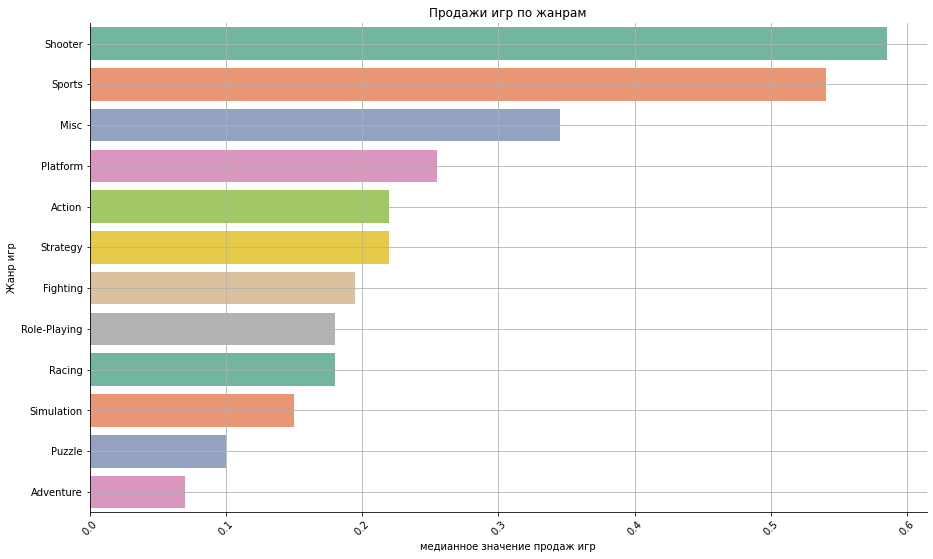

In [50]:
f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='median', y=game_genre.index, data=game_genre, orient='h',  palette='Set2')
plt.title('Продажи игр по жанрам')
plt.xlabel('медианное значение продаж игр')
plt.ylabel('Жанр игр')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

Самыми прибыльными жанрами являются:
- Shooter
- Sports
- Misc

С небольшим отрывом от лидеров идут:
- Platform
- Action
- Strategy

Жанры с низкими продажами:
- Simulation
- Puzzle
- Adventure

Пользователям интересны игры жанра спортивные или шутер, чем интелектуальные игры.

**Вывод:**

- Активный рост выпуска игр с 1993 по 2007 года, а в период с 2008 по 2009 годы являются пиковыми. После 2011 года происходит постепенный спад выпусков.

- Жизненый цыкл платформ составляет примерно от 10 до 15 лет.

- Лидерами на конец 2016 года стали платформы: PS4, XOne и PC. Скорее всего они могут быть актуальными на 2017 год.

- Зависимость между оценкой критиков намного сильнее, чем оценка от пользователей.

- Самыми прибыльными жанрами оказались: shooter, sports и misc. А жанры типа simulation, puzzle и adventure оказались менее прибыльными.


### Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Самые популярные платформы (топ-5) по регионам**

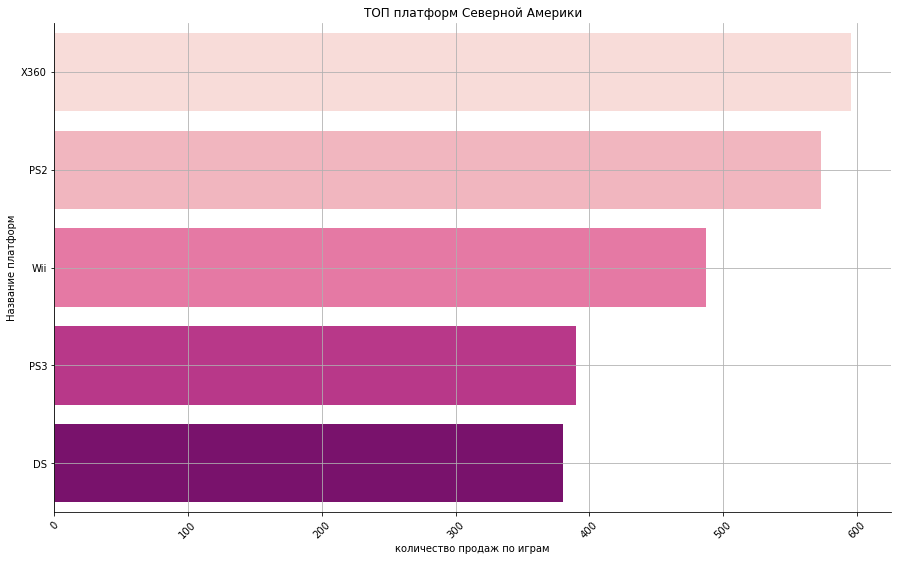

In [97]:
# NA_SALES
platform_na_sales = top_platform_condition.pivot_table(index='platform', values='na_sales', aggfunc='sum')
platform_na_sales.columns = ['sum']
platform_na_sales = platform_na_sales.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_na_sales.index, data=platform_na_sales, orient='h',  palette='RdPu')
plt.title('ТОП платформ Северной Америки')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название платформ')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()


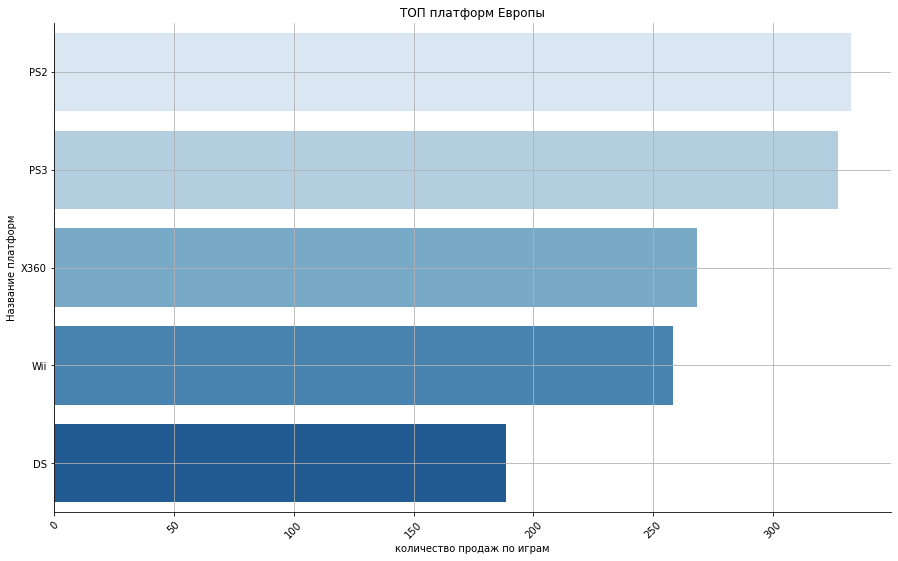

In [96]:
# EU_SALES
platform_eu_sales = top_platform_condition.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
platform_eu_sales.columns = ['sum']
platform_eu_sales = platform_eu_sales.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_eu_sales.index, data=platform_eu_sales, orient='h',  palette='Blues')
plt.title('ТОП платформ Европы')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название платформ')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()


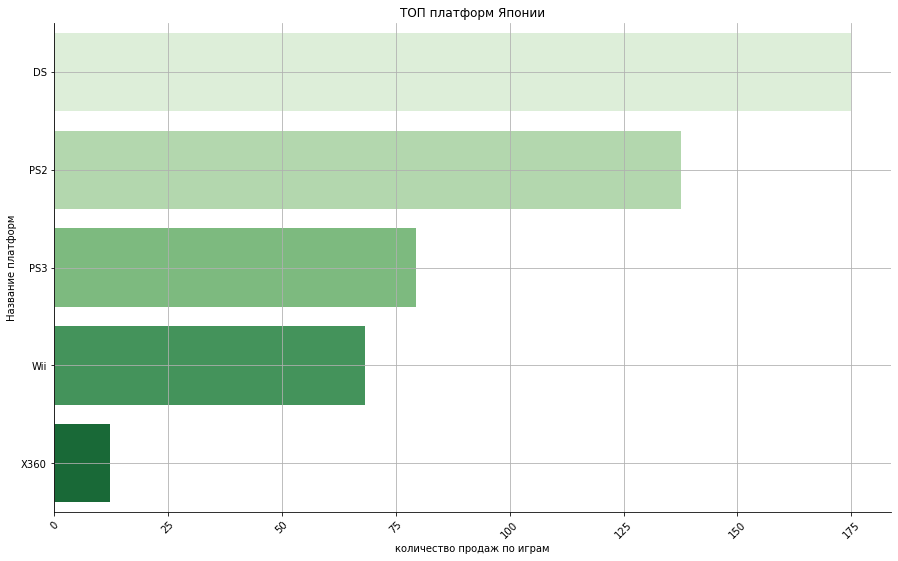

In [95]:
# JP_SALES
platform_jp_sales = top_platform_condition.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
platform_jp_sales.columns = ['sum']
platform_jp_sales = platform_jp_sales.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_jp_sales.index, data=platform_jp_sales, orient='h',  palette='Greens')
plt.title('ТОП платформ Японии')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название платформ')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()


В Северной Армерики полпулярны платформы X360 и PS2. В Европе популяны PS2 и PS3. В Японии популярны платформы DS и PS2. Платформа Wii более популярна в Северной Америке, чем в Европе и Японии. PS2  находятся  на лидирующих позициях в Армерике, Европе и Японии. В Японии платформа X360 находится в конце топа платформ, но в Америке занимает лидирующюю позицию. 

**Самые популярные жанры (топ-5) по регионам**

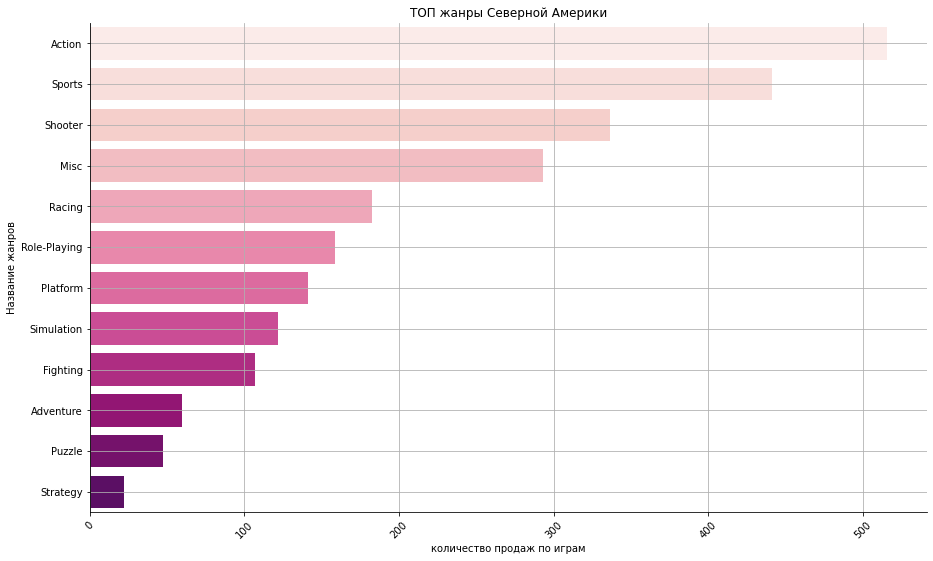

In [102]:
# NA_SALES
platform_na_genre = top_platform_condition.pivot_table(index='genre', values='na_sales', aggfunc='sum')
platform_na_genre.columns = ['sum']
platform_na_genre = platform_na_genre.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_na_genre.index, data=platform_na_genre, orient='h',  palette='RdPu')
plt.title('ТОП жанры Северной Америки')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название жанров')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

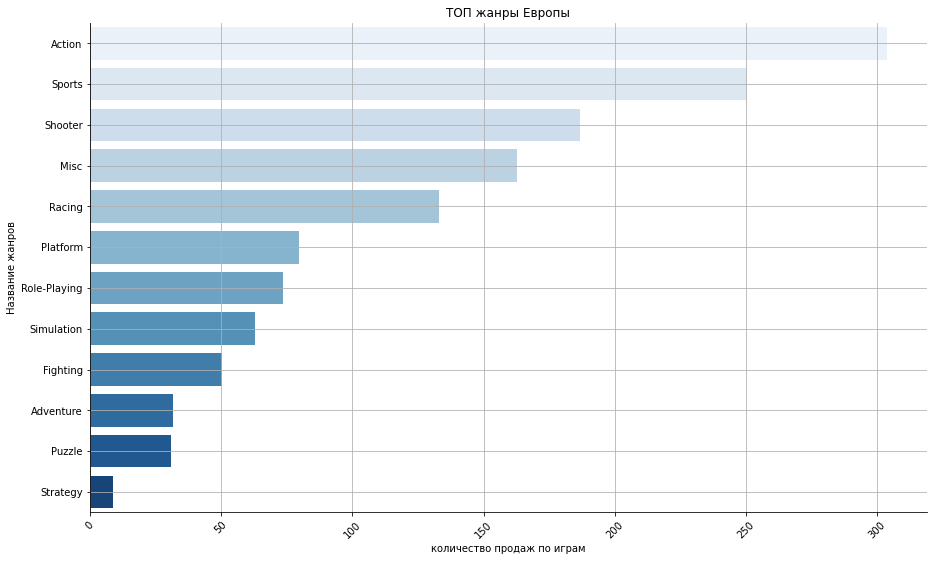

In [103]:
# EU_SALES
platform_eu_genre = top_platform_condition.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
platform_eu_genre.columns = ['sum']
platform_eu_genre = platform_eu_genre.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_eu_genre.index, data=platform_eu_genre, orient='h',  palette='Blues')
plt.title('ТОП жанры Европы')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название жанров')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

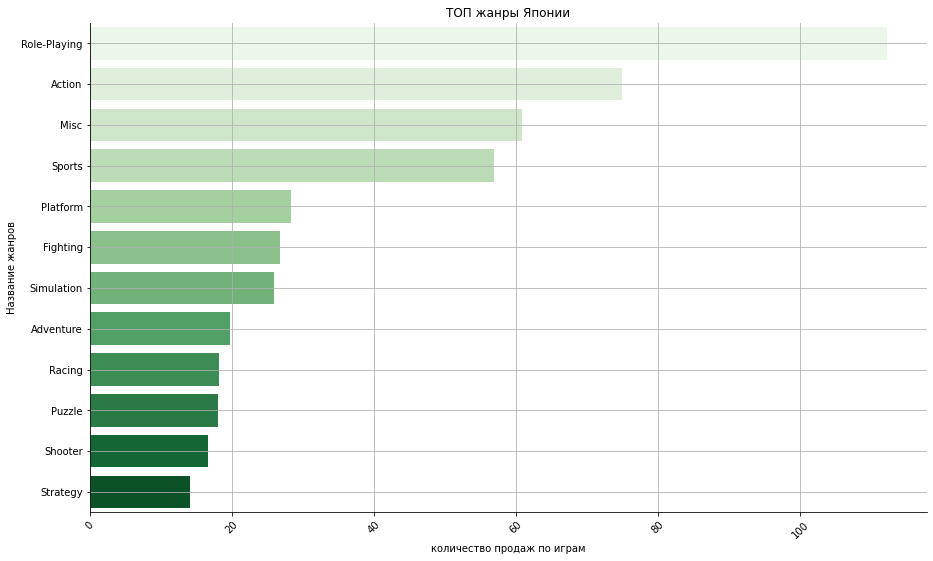

In [104]:
# JP_SALES
platform_jp_genre = top_platform_condition.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
platform_jp_genre.columns = ['sum']
platform_jp_genre = platform_jp_genre.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_jp_genre.index, data=platform_jp_genre, orient='h',  palette='Greens')
plt.title('ТОП жанры Японии')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название жанров')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

Разницы между Северной Америкой и Европой по жанрам нет. Возможно это зависит от одинакового культурного кода. Так как в основном игровая индустрия находится в двух этих регионах, то мы получаем идентичную картину по игровым жанрам. В лидирующих позициях находятся жанры Action, Sports, Shooters и Misc, а в конце списка Adventure, Puzzle и Strategy.
В Японии популярны жанры Role-Playing, Action и Misc, а в конце списка Puzzle, Shooter и Strategy. 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе**

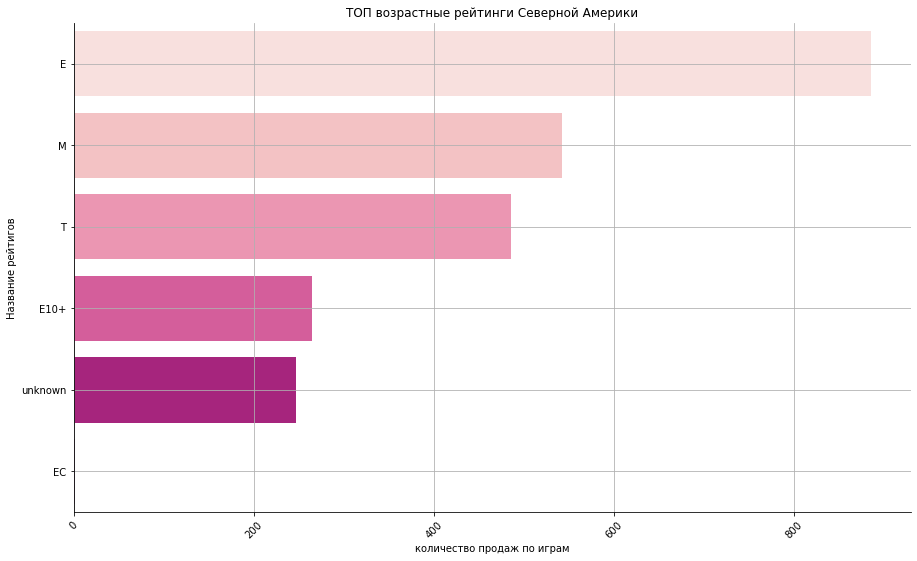

In [105]:
# NA_SALES
platform_na_rating = top_platform_condition.pivot_table(index='rating', values='na_sales', aggfunc='sum')
platform_na_rating.columns = ['sum']
platform_na_rating = platform_na_rating.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_na_rating.index, data=platform_na_rating, orient='h',  palette='RdPu')
plt.title('ТОП возрастные рейтинги Северной Америки')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название рейтигов')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

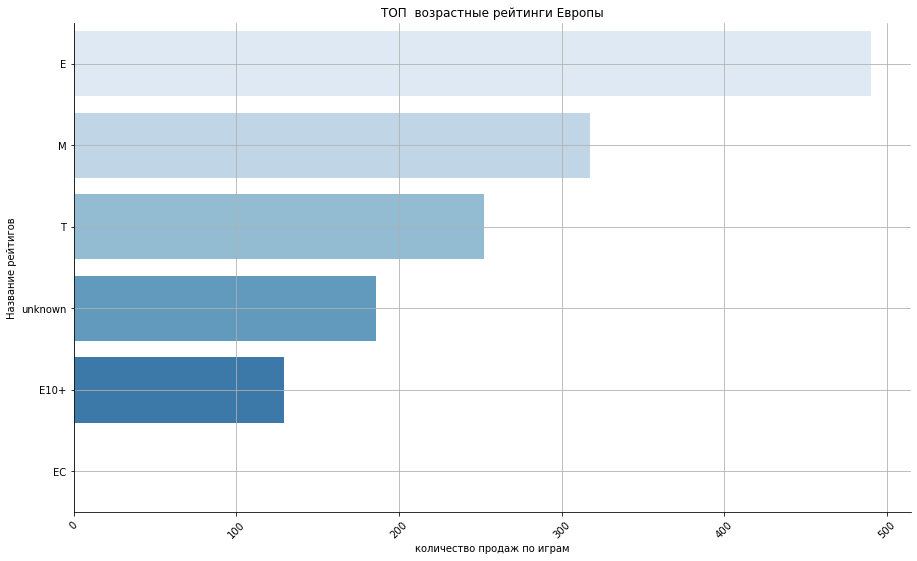

In [106]:
# EU_SALES
platform_eu_rating = top_platform_condition.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
platform_eu_rating.columns = ['sum']
platform_eu_rating = platform_eu_rating.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_eu_rating.index, data=platform_eu_rating, orient='h',  palette='Blues')
plt.title('ТОП  возрастные рейтинги Европы')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название рейтигов')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

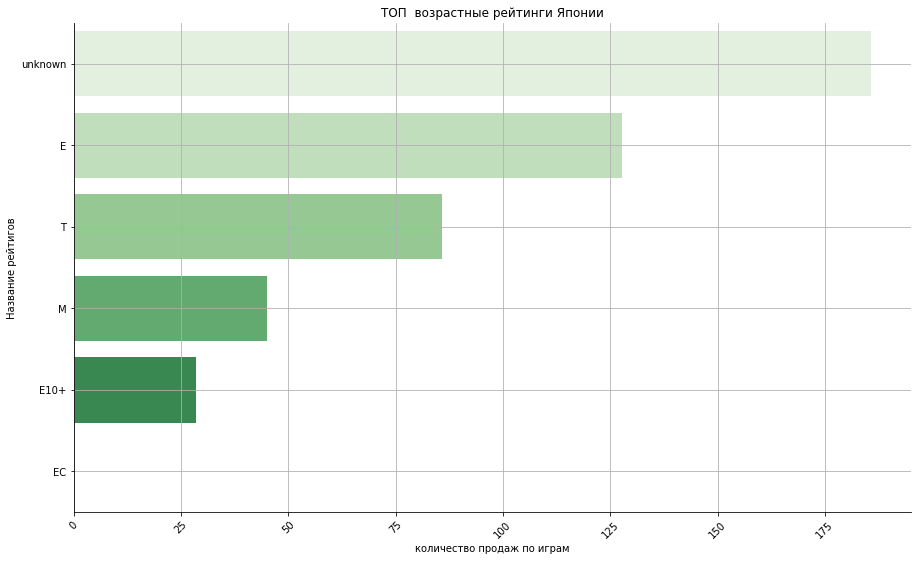

In [107]:
# JP_SALES
platform_jp_rating = top_platform_condition.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
platform_jp_rating.columns = ['sum']
platform_jp_rating = platform_jp_rating.sort_values(by='sum', ascending=False)

f, ax = plt.subplots(figsize=(15,9))
ax= sns.barplot(x='sum', y=platform_jp_rating.index, data=platform_jp_rating, orient='h',  palette='Greens')
plt.title('ТОП  возрастные рейтинги Японии')
plt.xlabel('количество продаж по играм')
plt.ylabel('Название рейтигов')
plt.xticks(rotation=45)
plt.grid()
sns.despine()
plt.show()

В Северной Америке и Европе практически идентичный возрастной рейтинг. Возможно это зависит от одинакового
культурного кода. Так как в основном игровая индустрия находится в двух этих регионах, то мы получаем идентичную картину по рейтингам.
Лидирующую позицию в Японии занимают рейтиг  который не определен. Это может зависеть от того, что многие игры не получили оценки по рейтингу. 
Единственно, что объединяет эти регионы, то что во всех лидирует рейтинг ("E" - для всех возрастов). 

**Вывод:**

1. Самые популярные платформы (топ-5) по регионам:
   - В Северной Армерики полпулярны платформы X360 и PS2. 
   - В Европе популяны PS2 и PS3. 
   - В Японии популярны платформы DS и PS2.
   - Платформа Wii более популярна в Северной Америке, чем в Европе и Японии. 
   - PS2 находятся на лидирующих позициях в Армерике, Европе и Японии. 
   - В Японии платформа X360 находится в конце топа платформ, но в Америке занимает лидирующюю позицию.


2. Самые популярные жанры (топ-5) по регионам:
   - Разницы между Северной Америкой и Европой по жанрам нет. Возможно это зависит от одинакового культурного кода.  В лидирующих позициях находятся жанры Action, Sports, Shooters и Misc, а в конце списка Adventure, Puzzle и Strategy. 
   - В Японии популярны жанры Role-Playing, Action и Misc, а в конце списка Puzzle, Shooter и Strategy.


3. Влияет ли рейтинг ESRB на продажи в отдельном регионе:
   - В Северной Америке и Европе практически идентичный возрастной рейтинг. 
   - Лидирующую позицию в Японии занимают рейтиг который не определен. Это может зависеть от того, что многие игры не получили оценки по рейтингу. 
   - Единственно, что объединяет эти регионы, то что во всех лидирует рейтинг ("E" - для всех возрастов).

### Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Задайте самостоятельно пороговое значение alpha.


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [108]:
# создадим две выборки
user_score_pc = data[(data['platform'] == 'PC') & (data['user_score'] >= 0)]['user_score']
user_score_xone = data[(data['platform'] == 'XOne') & (data['user_score'] >= 0)]['user_score']

print('Количество значений выбоки для PC:', user_score_pc.shape[0])
print('Количество значений выбоки для XOne:', user_score_xone.shape[0])

Количество значений выбоки для PC: 755
Количество значений выбоки для XOne: 182


Раз выборки у нас разные, то есть вероятность, что и дисперсии у совокупностей разные. Зададим параметр equal_var = False.

In [109]:
# применим t-test

alpha = 0.05 # уровень статической значимости

results = st.ttest_ind(
    user_score_pc, 
    user_score_xone,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


In [110]:
# проверка
print('Среднее значение оценок пользователей платформы PC:', round(user_score_pc.mean(), 2))
print('Среднее значение оценок пользователей платформы XOne:', round(user_score_xone.mean(), 2))

Среднее значение оценок пользователей платформы PC: 7.07
Среднее значение оценок пользователей платформы XOne: 6.52


Не можем отвергнуть нулевую гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, так как p-значение меньше, чем уровень статической значимости.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

- H0: Средние пользовательские рейтинги жанров Action и Sports разные
- H1: Средние пользовательские рейтинги жанров Action и Sports равные

In [111]:
# создадим две выборки
user_score_action = data[(data['genre'] == 'Action') & (data['user_score'] >= 0)]['user_score']
user_score_sports = data[(data['genre'] == 'Sports') & (data['user_score'] >= 0)]['user_score']

print('Количество значений выбоки для Action:', user_score_action.shape[0])
print('Количество значений выбоки для Sports:', user_score_sports.shape[0])

Количество значений выбоки для Action: 1796
Количество значений выбоки для Sports: 1081


Раз выборки у нас разные, то есть вероятность, что и дисперсии у совокупностей разные. Зададим параметр equal_var = False.

In [112]:
# применим t-test

alpha = 0.05 # уровень статической значимости

results = st.ttest_ind(
    user_score_action, 
    user_score_sports,
    equal_var=False)

print('p-значение:', round(results.pvalue, 2))

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.07
Не получилось отвергнуть нулевую гипотезу


In [113]:
# проверка
print('Среднее значение оценок пользователей платформы PC:', round(user_score_action.mean(), 2))
print('Среднее значение оценок пользователей платформы XOne:', round(user_score_sports.mean(), 2))

Среднее значение оценок пользователей платформы PC: 7.06
Среднее значение оценок пользователей платформы XOne: 6.95


Так как p-значение больше уровня статической значимости, то мы не можем отвергнуть, что средние пользовательские рейтинги жанров Action и Sports разные.

### Шаг 6. Напишите общий вывод

1. Загрузили данные с датасета (/datasets/games.csv) и провели предобработку данных:
   - размеры датасета: **11** столбцов и **16715** строк;
   - дубликаты отсутствуют;
   - Пропуски в датасете присутствуют в столбцах:
     - `Name`            
     - `Year_of_Release`               
     - `Genre`               
     - `Critic_Score`             
     - `User_Score`              
     - `Rating`      
   - Самые большие пропуски находятся в столбцах:
      - `critic_score`  :     **8578**
      - `user_score`    :     **6701**
      - `rating`        :     **6766**
      
      
      Скорей всего пропуски возникли по техническим причинам (некорректно загруженные/выгруженные данные, сбои в базе данных). Также были выявлены и незначительные пропуски, которые можно было удалить без последствий для данных. Еще пропуски в столбце `year_of_release` количество составило **269**, так как пропусков меньше 2%, то удалим их тоже. Потому что не у всех игр наверное смогли найти дату выхода. Столбец `rating` является категориальным, заполним его пропуски как `unknown`.
    
                       
   - В названии столбцов есть не соответствие со стилем:
       - Привели все названия столбцов в нижний регистр

   - С типами также есть не соответствия:
       - `Year_of_Release` 
       - `User_Score` 
       - `Critic_Score`
      
   - Также определили, что аббревиатура "tbd" (от англ. to be determined - будет определено позднее). Значит она показывает, что информация не определена, заменим ее на NaN.

   - Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.
 


2. Проведен иследовательский анализ данных:
   - В результате анализа выявили активный рост продаж с 1993 по 2007 год.
   - Пиковый рост продаж с 2008 по 2009 года, после снижение продаж.
   - Жизненый цыкл платформ составляет около 10 - 15 лет.
   - Самыми перспективными платформами на 2017 год стали платформы: PS4, XOne и PC.
   - Оценки критиков намного сильнее влияют на продажи игр, в то время как оценки пользователей практически не имеют почти никакой корреляции с продажами.
   - Самыми прибыльными жанрами оказались: shooter, sports и misc.
   - А жанры типа simulation, puzzle и adventure оказались менее прибыльными.
   
   
   
3. Анализ портрета пользователя каждого региона:
   - Самые популярные платформы (топ-5) по регионам:
       - В Северной Армерики полпулярны платформы X360 и PS2. 
       - В Европе популяны PS2 и PS3. 
       - В Японии популярны платформы DS и PS2.
       - Платформа Wii более популярна в Северной Америке, чем в Европе и Японии. 
       - PS2 находятся на лидирующих позициях в Армерике, Европе и Японии. 
       - В Японии платформа X360 находится в конце топа платформ, но в Америке занимает лидирующюю позицию.

   - Самые популярные жанры (топ-5) по регионам:
       - Разницы между Северной Америкой и Европой по жанрам нет. Возможно это зависит от одинакового культурного кода.  В лидирующих позициях находятся жанры Action, Sports, Shooters и Misc, а в конце списка Adventure, Puzzle и Strategy. 
       - В Японии популярны жанры Role-Playing, Action и Misc, а в конце списка Puzzle, Shooter и Strategy.

    - Выявили влияет ли рейтинг ESRB на продажи в отдельном регионе:
       - В Северной Америке и Европе практически идентичный возрастной рейтинг. 
       - Лидирующую позицию в Японии занимают рейтиг который не определен. Это может зависеть от того, что многие игры не получили оценки по рейтингу. 
       - Единственно, что объединяет эти регионы, то что во всех лидирует рейтинг ("E" - для всех возрастов).
 
4. Проверили гипотезы:
    - средние пользовательские рейтинги платформ Xbox One и PC одинаковые, это различие статически значимо
    - средние пользовательские рейтинги жанров Action и Sports разные.
    
    
В итоге:
- Жизненый цыкл платформ длится около 10 лет.
- От оценок критиков зависят продажи игровой индустрии. 
- Самыми прибыльными жанрами оказались: shooter, sports и misc. 
- Популярные платформы в Северной Америке и Европе являются (X360, PS2 и PS3), а в Японии (DS и PS2) 
- Разницы игровых жанров в Северной Америке и Европе практически нет, но Япония имеет отличия(Role-Playing, Action и Misc)
- Возрастной рейтинг в Северной Америке и Европе практически идентично, но в Японии  многие игры не получили оценки по рейтингу.
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.